In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

DATA PREPROCESSING


In [ ]:
data = pd.read_csv("/content/ml_datasource.csv")

In [ ]:
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


Checking Multicollinearity


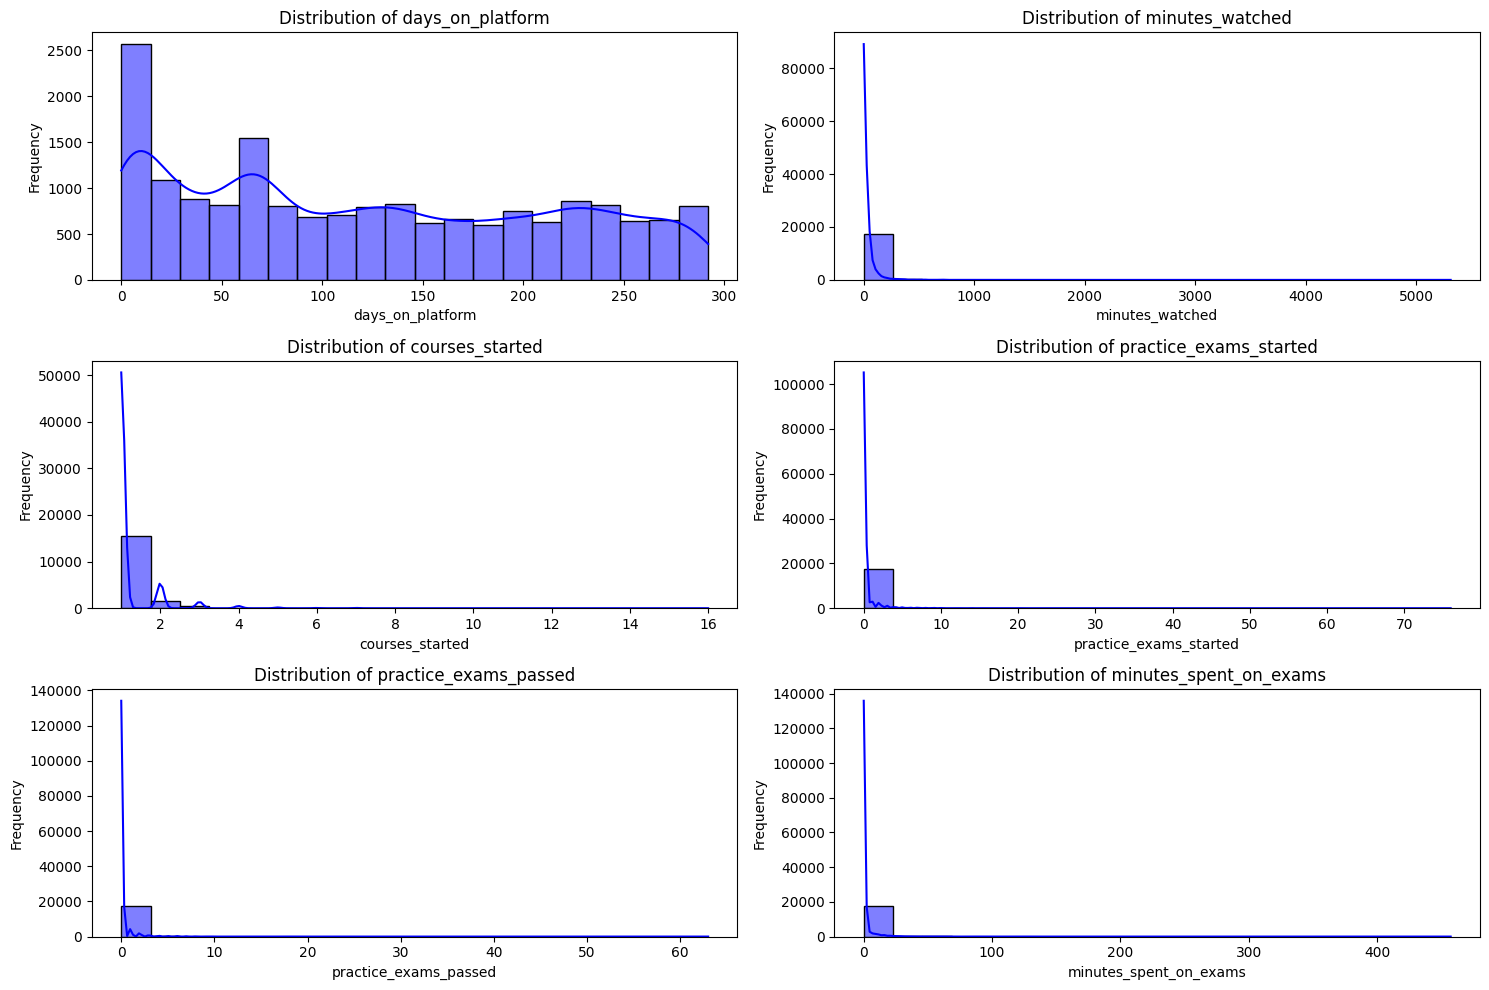

Skewness of numerical features:
days_on_platform           0.263594
minutes_watched           18.790416
courses_started            6.230362
practice_exams_started    16.538525
practice_exams_passed     18.799842
minutes_spent_on_exams    20.530941
dtype: float64


In [ ]:
numerical_cols = [
    "days_on_platform",
    "minutes_watched",
    "courses_started",
    "practice_exams_started",
    "practice_exams_passed",
    "minutes_spent_on_exams",
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Calculate skewness
skewness = data[numerical_cols].skew()
print("Skewness of numerical features:")
print(skewness)

In [ ]:
# Apply the criteria to filter out rows
filtered_data = data[
    (data["minutes_watched"] <= 1000) &
    (data["courses_started"] <= 10) &
    (data["practice_exams_started"] <= 10) &
    (data["minutes_spent_on_exams"] <= 40)
]

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_data)


Filtered DataFrame:
      student_country  days_on_platform  minutes_watched  courses_started  \
0                  US               288            358.1                1   
1                  SG               260              1.7                1   
2                  TR               260             22.4                1   
3                  KE               259             18.8                1   
4                  IN               259            118.0                2   
...               ...               ...              ...              ...   
17756              EG                 0              0.8                1   
17757              IN                 0              0.1                1   
17758              CM                 0              7.8                1   
17759              CA                 0             10.4                1   
17760              SA                 0              0.1                1   

       practice_exams_started  practice_exams_passed  m

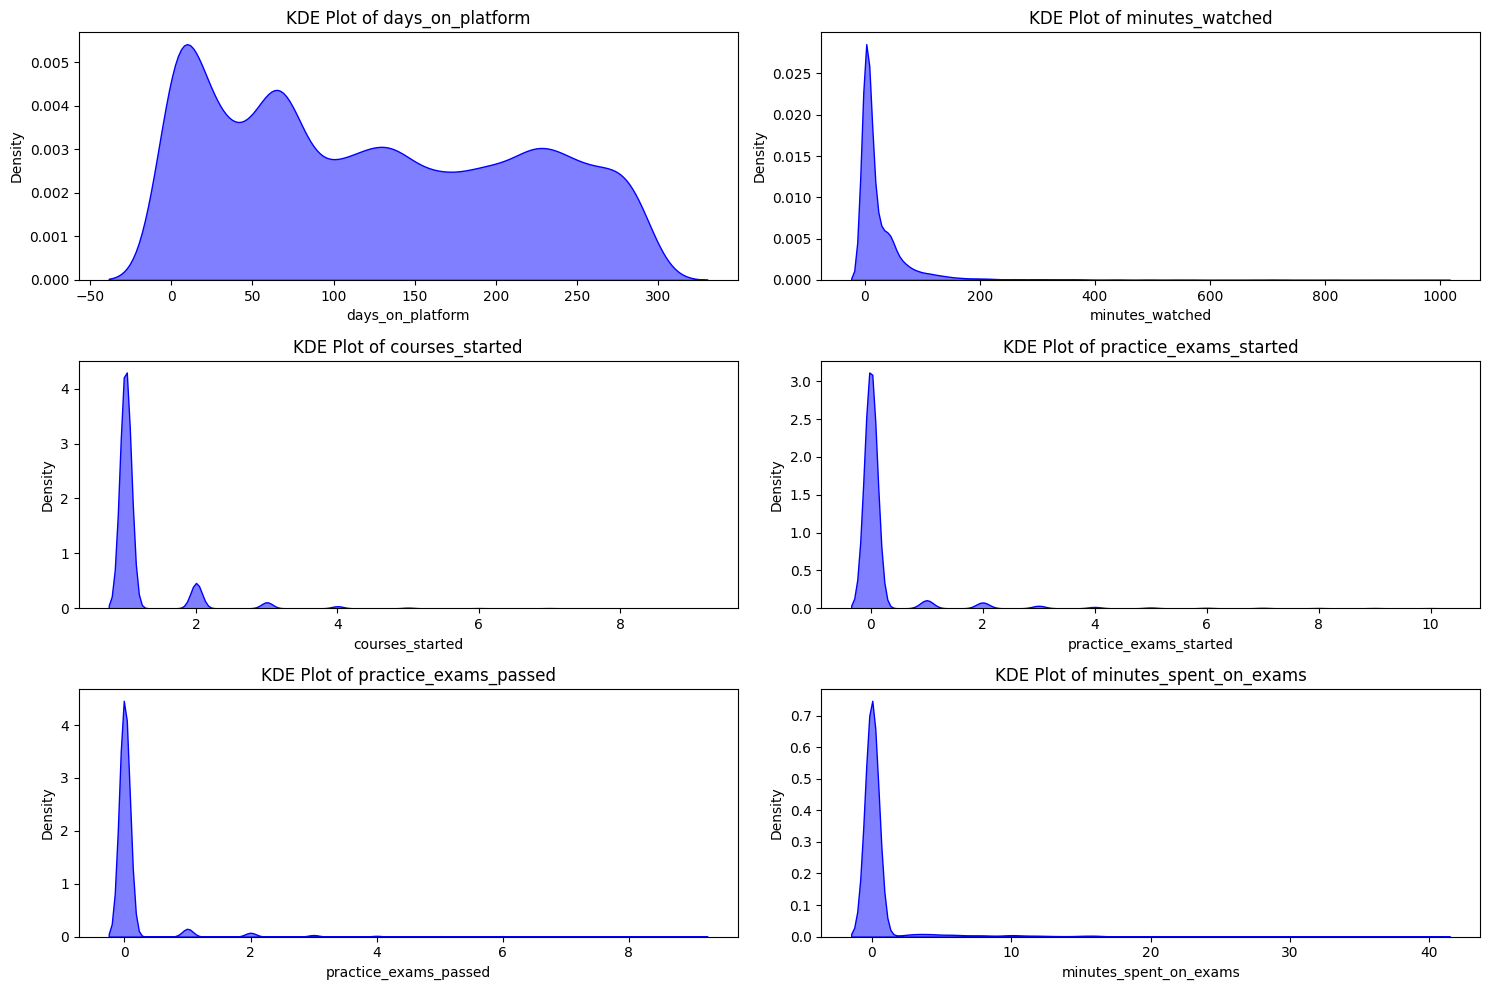

In [ ]:
# Assuming the filtered DataFrame is named data_no_outliers
data_no_outliers = filtered_data  # Replace with your actual filtered DataFrame

# Numerical columns to plot
numerical_cols = [
    "days_on_platform",
    "minutes_watched",
    "courses_started",
    "practice_exams_started",
    "practice_exams_passed",
    "minutes_spent_on_exams",
]

# Create subplots for KDE plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data_no_outliers[col], fill=True, color="blue", alpha=0.5)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()


Creating a variance_inflation_factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming the filtered data is in a DataFrame named data_no_outliers
numerical_cols = [
    "days_on_platform",
    "minutes_watched",
    "courses_started",
    "practice_exams_started",
    "practice_exams_passed",
    "minutes_spent_on_exams",
]

# Extract numerical data
numerical_data = data_no_outliers[numerical_cols]

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_data),
    columns=numerical_cols
)

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i) for i in range(df.shape[1])
    ]
    return vif_data

# Calculate initial VIF and remove features with VIF > 5
data_no_mult = numerical_data_scaled.copy()
while True:
    vif = calculate_vif(data_no_mult)
    print("\nCurrent VIF values:")
    print(vif)

    # Check if any VIF > 5
    if vif["VIF"].max() > 5:
        # Identify feature with highest VIF
        feature_to_remove = vif.loc[vif["VIF"].idxmax(), "Feature"]
        print(f"Removing feature with highest VIF: {feature_to_remove}")

        # Remove the feature with the highest VIF
        data_no_mult = data_no_mult.drop(columns=[feature_to_remove])
    else:
        print("\nAll features now have VIF <= 5.")
        break

# Final VIF values
final_vif = calculate_vif(data_no_mult)
print("\nFinal VIF values:")
print(final_vif)



Current VIF values:
                  Feature       VIF
0        days_on_platform  1.026055
1         minutes_watched  1.526461
2         courses_started  1.363355
3  practice_exams_started  9.731895
4   practice_exams_passed  7.505868
5  minutes_spent_on_exams  3.190319
Removing feature with highest VIF: practice_exams_started

Current VIF values:
                  Feature       VIF
0        days_on_platform  1.024319
1         minutes_watched  1.525433
2         courses_started  1.363255
3   practice_exams_passed  2.474077
4  minutes_spent_on_exams  2.479652

All features now have VIF <= 5.

Final VIF values:
                  Feature       VIF
0        days_on_platform  1.024319
1         minutes_watched  1.525433
2         courses_started  1.363255
3   practice_exams_passed  2.474077
4  minutes_spent_on_exams  2.479652


In [ ]:
# Replace NaN values with the string 'NAM' for all columns
data_no_nulls = data_no_outliers.fillna(value='NAN', axis=1)

# Confirm that there are no NaN values left in the DataFrame
print("Checking for NaN values in the DataFrame:")
print(data_no_nulls.isnull().sum())
if data_no_nulls.isnull().sum().sum() == 0:
    print("All NaN values have been successfully replaced.")
else:
    print("Some NaN values still exist in the DataFrame.")


Checking for NaN values in the DataFrame:
student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64
All NaN values have been successfully replaced.


In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Assuming 'data_no_nulls' is the DataFrame without NaN values
# Separate inputs (features) and target (label)
X = data_no_nulls.drop(columns=["purchased"])  # Inputs: all columns except the target
y = data_no_nulls["purchased"]  # Target: 'purchased' column

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X,  # Input data
    y,  # Target data
    test_size=0.2,  # Proportion of data to use for testing
    random_state=42,  # Random seed for reproducibility
    stratify=y  # Stratify split to maintain class distribution
)

# Display shapes of the resulting datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (14100, 7)
x_test shape: (3526, 7)
y_train shape: (14100,)
y_test shape: (3526,)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=170)

# Encode the 'student_country' column in the training dataset
x_train['student_country_enc'] = enc.fit_transform(
    x_train['student_country'].to_numpy().reshape(-1, 1)
)

# Apply the same transformation to the test dataset
x_test['student_country_enc'] = enc.transform(
    x_test['student_country'].to_numpy().reshape(-1, 1)
)

# Drop the original 'student_country' column from both datasets
x_train = x_train.drop(columns=['student_country'])
x_test = x_test.drop(columns=['student_country'])

# Convert the training and testing datasets to numpy ndarrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Display confirmation of the transformations
print("Encoded and transformed datasets:")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Encoded and transformed datasets:
x_train shape: (14100, 7)
x_test shape: (3526, 7)
y_train shape: (14100,)
y_test shape: (3526,)


In [ ]:
# Import necessary modules
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np # Import numpy

# Prepare your logistic regression model
# x_train and y_train should already be in ndarray format as x_train_array and y_train_array
# Convert x_train to float to ensure numerical data type
x_train = x_train.astype(float) # convert x_train to float

log_reg = sm.Logit(y_train, x_train)  # Define the model

# Fit the model to the training data
log_reg_results = log_reg.fit()  # Fit the logistic regression

# Display a summary of the fitted model
print(log_reg_results.summary())  # Model coefficients and statistics

# Predict probabilities on the test data
# Convert x_test to float for prediction
x_test = x_test.astype(float) # convert x_test to float
y_pred_prob = log_reg_results.predict(x_test)

# Convert probabilities to class predictions (0 or 1) by rounding
y_pred = [round(prob) for prob in y_pred_prob]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

UFuncTypeError: Cannot cast ufunc 'solve1' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
print(x_train.dtype)
print(y_train.dtype)

float64
object


In [ ]:
print(x_train[:5])  # Check a sample of x_train
print(y_train[:5])  # Check a sample of y_train

[[238.     1.3    1.     0.     0.     0.   119.  ]
 [ 10.     5.1    1.     0.     0.     0.    53.  ]
 [  2.    95.5    2.     0.     0.     0.   153.  ]
 [152.    16.9    1.     0.     0.     0.    69.  ]
 [ 61.    42.5    1.     1.     1.     3.85  91.  ]]
[0 0 1 0 0]


In [ ]:
import numpy as np

# Ensure x_train and y_train are NumPy arrays of numeric type
x_train = np.array(x_train, dtype='float64')
y_train = np.array(y_train, dtype='float64')

In [ ]:
import pandas as pd

# Fill NaN values with the mean of each column in x_train
x_train = pd.DataFrame(x_train).fillna(x_train.mean()).to_numpy()


In [ ]:
print(x_train.dtype)
print(y_train.dtype)


float64
float64


In [ ]:
log_reg = sm.Logit(y_train, x_train)
log_reg_results = log_reg.fit()
print(log_reg_results.summary())


Optimization terminated successfully.
         Current function value: 0.152824
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14093
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                  0.5029
Time:                        09:43:05   Log-Likelihood:                -2154.8
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0686      0.002    -31.925      0.000      -0.073      -0.064
x2             0.0153      0

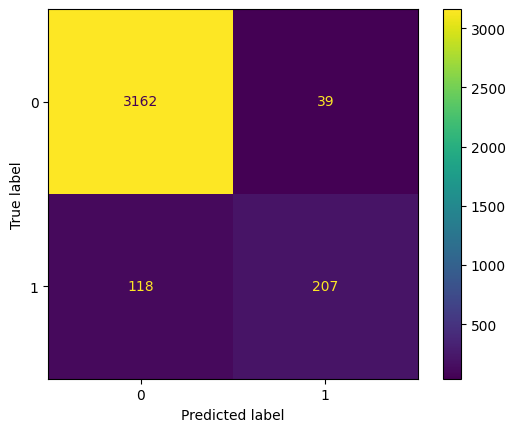

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm


# ... (your existing code to prepare x_train, y_train, x_test, and log_reg_results) ...

# Ensure y_test is a NumPy array with numeric type and contains only 0 and 1
y_test = np.array(y_test, dtype='float64')  # Convert to numeric type if not already
y_test = np.nan_to_num(y_test, nan=0.0, posinf=0.0, neginf=0.0) # Replace NaN and inf values with 0
y_test = y_test.astype(int) # convert to integers
y_test = np.clip(y_test, 0, 1)  # Clip values to be within 0 and 1

x_test = pd.DataFrame(x_test).apply(pd.to_numeric, errors='coerce').to_numpy()
x_test = x_test.astype(float)  # Convert x_test to float
y_pred_prob = log_reg_results.predict(x_test)

# Convert probabilities to class predictions (0 or 1) by rounding
y_pred = [round(prob) for prob in y_pred_prob]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

Creating a K-Nearest Neighbors Model

Best Parameters: {'n_neighbors': 17, 'weights': 'distance'}
Classification Report:
                precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      3201
    Purchased       0.76      0.74      0.75       325

     accuracy                           0.95      3526
    macro avg       0.87      0.86      0.86      3526
 weighted avg       0.95      0.95      0.95      3526



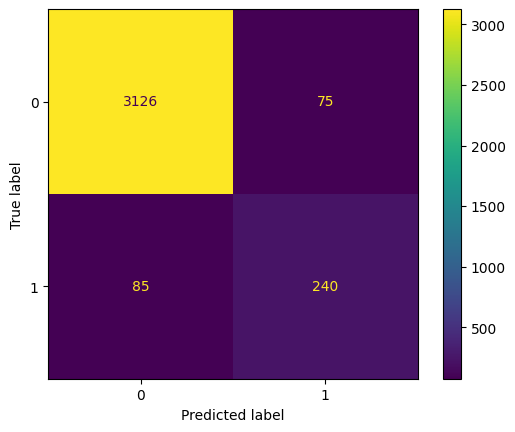

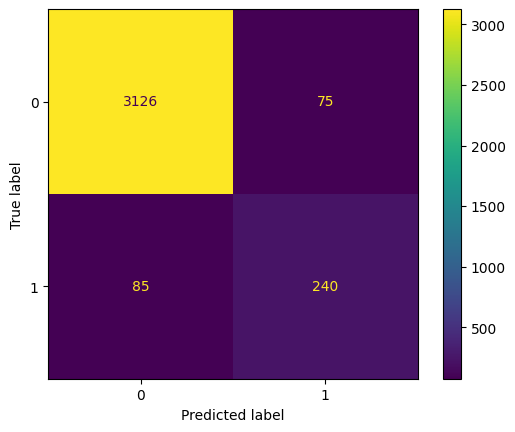

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np # import numpy

# Step 1: Define the range of parameters for tuning
parameters_knn = {
    'n_neighbors': range(1, 51),  # Number of neighbors to test
    'weights': ['uniform', 'distance']  # Weight functions to test
}

# Step 2: Initialize GridSearchCV with KNeighborsClassifier
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parameters_knn,
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)
# x_train is already a NumPy array, so no need to convert again
x_train_array = x_train
y_train_array = y_train # y_train is already a NumPy array, so no need to convert


# Step 3: Fit GridSearchCV to the training data
grid_search_knn.fit(x_train_array, y_train_array)

# Step 4: Extract the best model from the grid search
knn_clf = grid_search_knn.best_estimator_
print(f"Best Parameters: {grid_search_knn.best_params_}")

# Assuming you have x_test as a pandas DataFrame or a list
x_test_array = np.array(x_test) # convert x_test to numpy array

# Step 5: Make predictions on the test data
y_test_pred_knn = knn_clf.predict(x_test_array) # Make sure x_test_array is defined and a NumPy array

# Assuming you have y_test as a pandas DataFrame or a list
y_test_array = np.array(y_test)  # Convert y_test to a NumPy array if it's not already

# Step 6: Build and display the confusion matrix
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn) # Make sure y_test_array is defined and a NumPy array
conf_matrix.plot()  # Display the confusion matrix

# Step 7: Generate and print the classification report
target_names = ['Not Purchased', 'Purchased']  # Class names
report = classification_report(y_test_array, y_test_pred_knn, target_names=target_names) # Make sure y_test_array is defined and a NumPy array
print("Classification Report:\n", report)

Best Parameters: {'C': 7, 'gamma': 'scale', 'kernel': 'poly'}
Classification Report:
                precision    recall  f1-score   support

Not Purchased       0.97      0.99      0.98      3201
    Purchased       0.83      0.67      0.74       325

     accuracy                           0.96      3526
    macro avg       0.90      0.83      0.86      3526
 weighted avg       0.95      0.96      0.95      3526



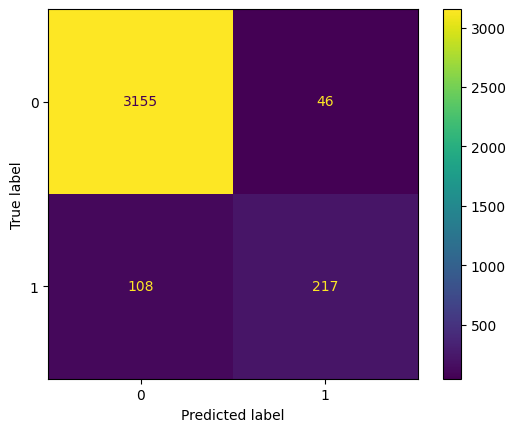

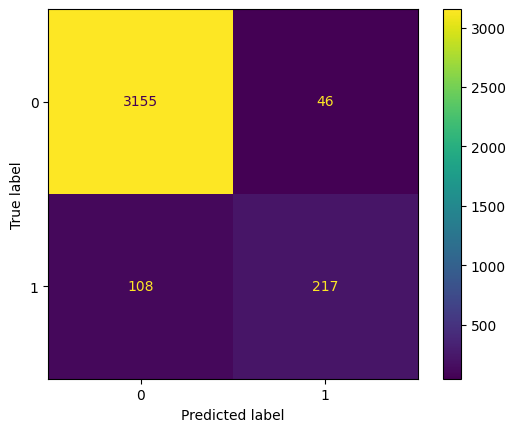

In [ ]:
# Import necessary modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Scale the features to a range between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train_array)

# Transform the test data (without refitting the scaler)
x_test_scaled = scaler.transform(x_test_array)

# Step 2: Define the parameter grid for GridSearchCV
parameters_svc = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types to try
    'C': range(1, 11),  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Step 3: Initialize the GridSearchCV with the SVC estimator
grid_search_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=parameters_svc,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Step 4: Fit GridSearchCV to the training data
grid_search_svc.fit(x_train_scaled, y_train_array)

# Step 5: Extract the best model and parameters
svc_clf = grid_search_svc.best_estimator_
print(f"Best Parameters: {grid_search_svc.best_params_}")

# Step 6: Make predictions on the test data
y_test_pred_svc = svc_clf.predict(x_test_scaled)

# Step 7: Build and display the confusion matrix
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svc)
conf_matrix.plot()  # Display the confusion matrix

# Step 8: Generate and print the classification report
target_names = ['Not Purchased', 'Purchased']  # Class names
report = classification_report(y_test_array, y_test_pred_svc, target_names=target_names)
print("Classification Report:\n", report)


Creating a Decision Trees Model

Best Parameters: {'ccp_alpha': 0.001}


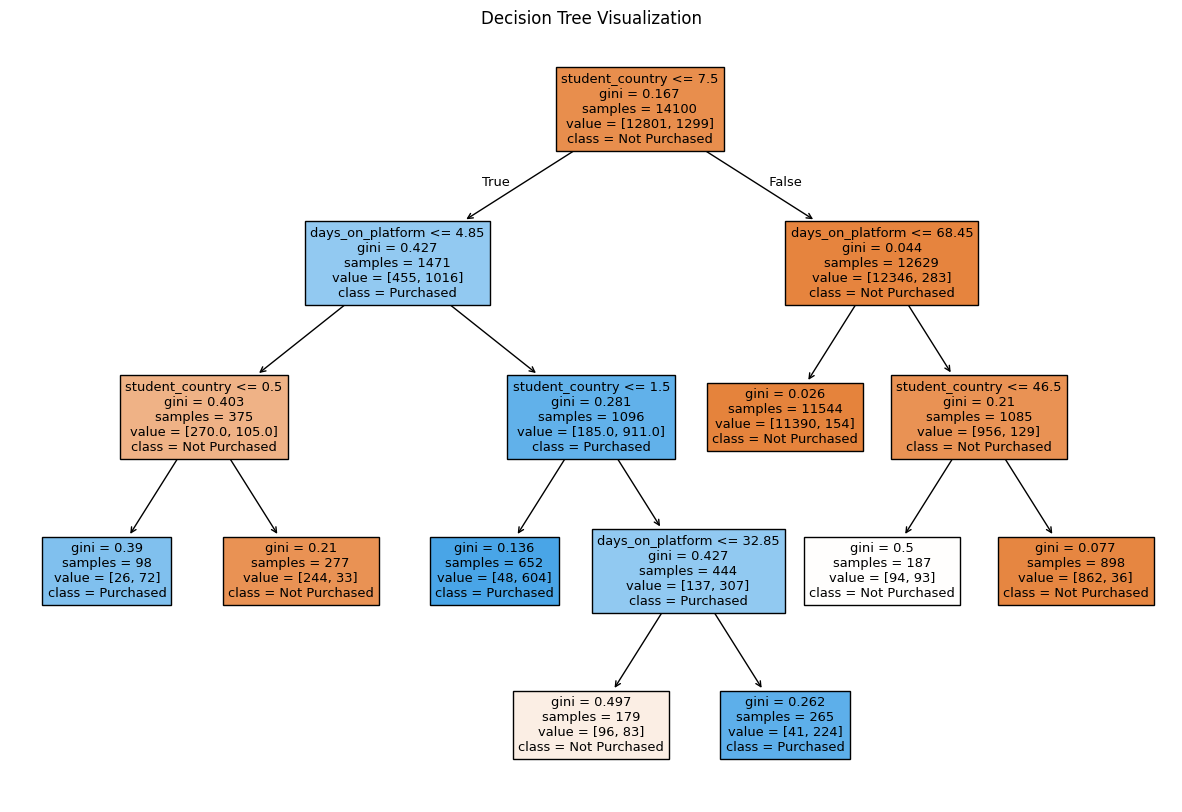

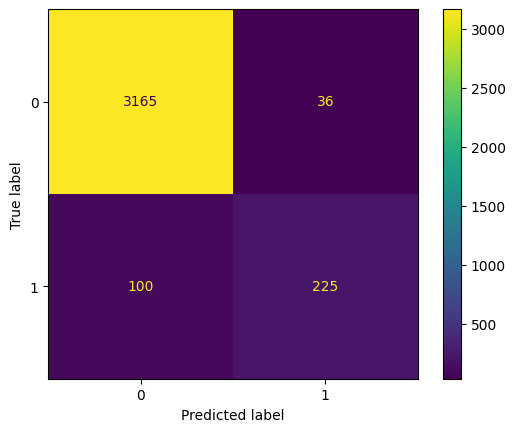

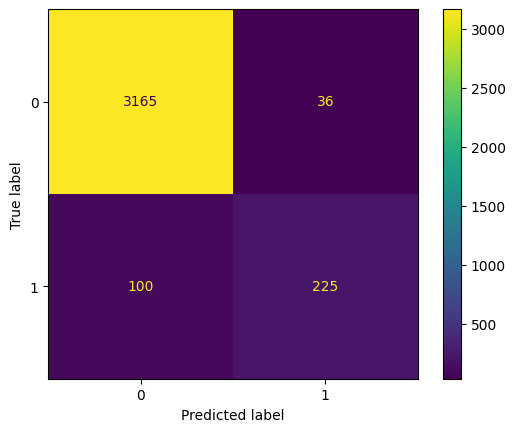

Classification Report:
                precision    recall  f1-score   support

Not Purchased       0.97      0.99      0.98      3201
    Purchased       0.86      0.69      0.77       325

     accuracy                           0.96      3526
    macro avg       0.92      0.84      0.87      3526
 weighted avg       0.96      0.96      0.96      3526



In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Define the parameter grid for GridSearchCV
parameters_dt = {
    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]  # Complexity parameter values
}

# Step 2: Initialize the DecisionTreeClassifier with a fixed random_state
dt_classifier = DecisionTreeClassifier(random_state=365)

# Step 3: Set up the GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_classifier,
    param_grid=parameters_dt,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Step 4: Fit the grid search on the (non-scaled) training data
grid_search_dt.fit(x_train_array, y_train_array)

# Step 5: Extract the best model and parameters
best_dt_clf = grid_search_dt.best_estimator_
print(f"Best Parameters: {grid_search_dt.best_params_}")

feature_names = ['your_column_names']
feature_names = list(data.columns)
feature_names = feature_names[:-1]

# Step 6: Display the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    best_dt_clf,
    filled=True,  # Color nodes by class purity
    feature_names=feature_names,  # Feature names for the splits
    class_names=['Not Purchased', 'Purchased']  # Class labels
)
plt.title("Decision Tree Visualization")
plt.show()

# Step 7: Make predictions on the test data
y_test_pred_dt = best_dt_clf.predict(x_test_array)

# Step 8: Build and display the confusion matrix
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_dt)
conf_matrix.plot()
plt.show()

# Step 9: Generate and print the classification report
report = classification_report(y_test_array, y_test_pred_dt, target_names=['Not Purchased', 'Purchased'])
print("Classification Report:\n", report)


Creating a Random Forests Model

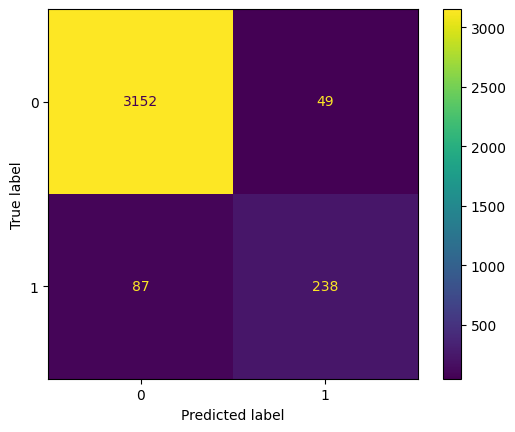

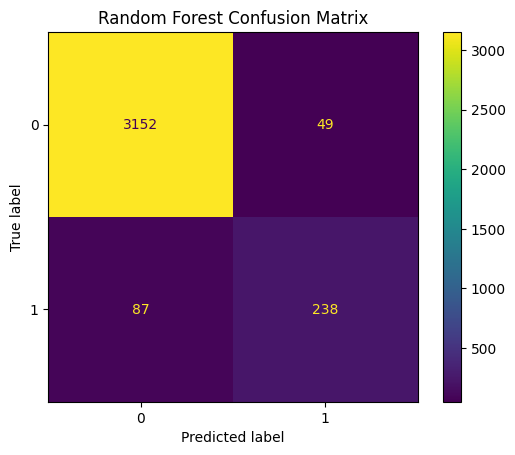

Classification Report for Random Forest Model:
                precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      3201
    Purchased       0.83      0.73      0.78       325

     accuracy                           0.96      3526
    macro avg       0.90      0.86      0.88      3526
 weighted avg       0.96      0.96      0.96      3526



In [ ]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Retrieve the best ccp_alpha value from the previous task
best_ccp_alpha = grid_search_dt.best_params_['ccp_alpha']  # Replace 'grid_search_dt' with your grid search variable

# Step 2: Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    random_state=365,      # Fixed random state for reproducibility
    ccp_alpha=best_ccp_alpha  # Use the best pruning parameter
)

# Step 3: Fit the model to the training data
rf_classifier.fit(x_train_array, y_train_array)

# Step 4: Make predictions on the test data
y_test_pred_rf = rf_classifier.predict(x_test_array)

# Step 5: Display the confusion matrix
conf_matrix_rf = ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_rf)
conf_matrix_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Step 6: Generate and print the classification report
report_rf = classification_report(y_test_array, y_test_pred_rf, target_names=['Not Purchased', 'Purchased'])
print("Classification Report for Random Forest Model:\n", report_rf)
